![](logo.png)

# <font color='red'>Advanced Programming with Python</font>

> ### Apply() and Map()
> ### Reduce()
> ### Filter()
> ### Zip()
> ### All() and Any()
> ### Regular Expressions()

# <font color='red'>Apply() and Map()</font>

Essentially, **apply()** and **map()** do the same thing. However, **map()** is typically used for pandas series or list and **apply()** is used for dataframes, particularly when more than one column is involved (but can be used on a single column). Each of these uses a function to iterate over the element. 

Let's look at some examples to understand how to use each function:

## Map()

In [2]:
# Create a list
temps = [0, 22.5, 40, 100]

In [3]:
# Define a function to use
def fahrenheit(celsius):
    return (9/5)*celsius + 32

In [5]:
# Map() the elements of temps using the fahrenheit function
f_temps = map(fahrenheit, temps)

In [6]:
# List the elements of f_temp
list(f_temps)

[32.0, 72.5, 104.0, 212.0]

In [10]:
## Map() using a lambda function - x must be function arguement
list(map(lambda x: (9/5)*x + 32, temps))

[32.0, 72.5, 104.0, 212.0]

## Apply()

In [11]:
import pandas as pd
import numpy as np

In [12]:
# Read in peanut yield dataframe
yields = pd.read_csv('peanut_yield.txt', header=0, sep='\t')

In [13]:
yields.head()

,Year,Location,Name,Label,NC_Accession,Plot_Yield,Yield
0,2014,LEW,ATP,Advanced Testing Program - Yield,ACI WT09-0761,9.0,2733
1,2014,RMT,ATP,Advanced Testing Program - Yield,ACI WT09-0761,10.2,3085
2,2014,WHI,ATP,Advanced Testing Program - Yield,ACI WT09-0761,10.2,3085
3,2015,LEW,ATP,Advanced Testing Program - Yield,ACI WT11-0351,15.3,4632
4,2015,RMT,ATP,Advanced Testing Program - Yield,ACI WT11-0351,10.7,3226


In [27]:
# Create a function to re-create Plot_Yield but with 2 decimals
def plot_yield(x):
    return round(x/302.5, 2)

In [29]:
yields['Plot_Wt'] = yields['Yield'].apply(plot_yield)

In [30]:
yields.head()

,Year,Location,Name,Label,NC_Accession,Plot_Yield,Yield,Plot_Wt
0,2014,LEW,ATP,Advanced Testing Program - Yield,ACI WT09-0761,9.0,2733,9.03
1,2014,RMT,ATP,Advanced Testing Program - Yield,ACI WT09-0761,10.2,3085,10.20
2,2014,WHI,ATP,Advanced Testing Program - Yield,ACI WT09-0761,10.2,3085,10.20
3,2015,LEW,ATP,Advanced Testing Program - Yield,ACI WT11-0351,15.3,4632,15.31
4,2015,RMT,ATP,Advanced Testing Program - Yield,ACI WT11-0351,10.7,3226,10.66


In [31]:
# Selection Method with If-Else Statement
def select(x):
    if x > 3000:
        return 'Yes'
    else:
        return 'No'
    
yields['Yield'].apply(select)

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
2628    Yes
2629     No
2630    Yes
2631    Yes
2632    Yes
Name: Yield, Length: 2633, dtype: object

In [33]:
# Lambda functions work with apply
yields['Yield'].apply(lambda x: 'Yes' if x > 3000 else 'No')

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
2628    Yes
2629     No
2630    Yes
2631    Yes
2632    Yes
Name: Yield, Length: 2633, dtype: object

### Mapping Dictionary Values

In [47]:
### Is it an If - Else statement?
ls = pd.read_csv('Leaf_Spot.txt', header=0, sep='\t')

In [48]:
# Use the top 10 rows instead of entire dataframes
ls = ls.head(10)

In [50]:
convert = {'GP-NC 343':'Germplasm','PI 576636':'Germplasm','N14035olSmT':'Breeding Line'}

In [52]:
ls['Type'] = ls['NC Ac'].map(convert).fillna('Cultivar')

In [54]:
ls

,Plot,Block,Entry,NC Ac,Defol,Type
0,1156,15,207,GP-NC 343,4,Germplasm
1,2039,11,207,GP-NC 343,4,Germplasm
2,1161,15,210,PI 576636,7,Germplasm
3,2112,14,210,PI 576636,6,Germplasm
4,1159,15,204,Emery,7,Cultivar
5,2064,8,204,Emery,7,Cultivar
6,1157,15,205,Bailey II,5,Cultivar
7,2005,9,205,Bailey II,6,Cultivar
8,1160,15,209,N14035olSmT,5,Breeding Line
9,2114,13,209,N14035olSmT,5,Breeding Line


# <font color='red'>Reduce()</font>

Understanding reduce() can be difficult, so pay careful attention to these notes. The function reduce(function, sequence) continually applies the function to the sequence. It then returns a single value.

If seq = [ s1, s2, s3, ... , sn ], calling reduce(function, sequence) works like this:

1. At first the first two elements of seq will be applied to function, i.e. func(s1,s2). 
    The list on which reduce() works looks now like this: [ function(s1, s2), s3, ... , sn ]
2. In the next step the function will be applied on the previous result and the third element of the list, i.e. function(function(s1, s2),s3)
    The list looks like this now: [ function(function(s1, s2),s3), ... , sn ]
3. It continues like this until just one element is left and return this element as the result of reduce()

Let's see an example:

In [55]:
# Reduce needs to be imported from functools
from functools import reduce

In [56]:
# Create a list
lst =[47,11,42,13]

In [57]:
# Use reduce() on the list
reduce(lambda x,y: x+y,lst)

113

Let's look at the diagram to see what is happeneing with reduce()

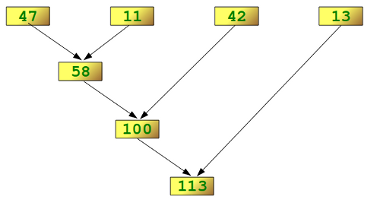

In [59]:
from IPython.display import Image
Image('http://www.python-course.eu/images/reduce_diagram.png')

Reduce() subsequently reduces the number of values until there is single value left in the list

In [60]:
#Find the maximum of a sequence (This already exists as max())
max_find = lambda a,b: a if (a > b) else b

In [61]:
#Find max
reduce(max_find,lst)

47

# <font color='red'>Filter()</font>

The function filter(function, list) offers a convenient way to filter out all the elements of an iterable, for which the function returns True.

The function filter(function,list) needs a function as its first argument. The function needs to return a Boolean value (either True or False). This function will be applied to every element of the iterable. Only if the function returns True will the element of the iterable be included in the result.

Like map(), filter() returns an iterator - that is, filter yields one result at a time as needed. Iterators and generators will be covered in an upcoming lecture. For now, since our examples are so small, we will cast filter() as a list to see our results immediately.

Let's see some examples:

In [66]:
# Make a list
new_list = range(20)

In [67]:
# Make a function
def even_check(num):
    if num%2 ==0:
        return True

In [68]:
# Use filter() on new_list using the function
list(filter(even_check, new_list))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [69]:
# Filter() is typically used with a lambda function
list(filter(lambda x: x%2 == 0, new_list))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

# <font color='red'>Zip()</font>

zip() makes an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator.

zip() is equivalent to:

def zip(*iterables):
    # zip('ABCD', 'xy') --> Ax By
    sentinel = object()
    iterators = [iter(it) for it in iterables]
    while iterators:
        result = []
        for it in iterators:
            elem = next(it, sentinel)
            if elem is sentinel:
                return
            result.append(elem)
        yield tuple(result)
zip() should only be used with unequal length inputs when you don’t care about trailing, unmatched values from the longer iterables.

Let's see it in action in some examples:

In [70]:
x = [1,2,3]
y = [4,5,6]

# Zip the lists together
list(zip(x,y))

[(1, 4), (2, 5), (3, 6)]

NOTE: The zipped list returns tuples. What if one iterable is longer than the other?

In [71]:
x = [1,2,3]
y = [4,5,6,7,8]

# Zip the lists together
list(zip(x,y))

[(1, 4), (2, 5), (3, 6)]

NOTE: **zip()** is defined by the shortest iterable length. Its generally advised not to zip unequal length iterables unless your very sure you only need partial tuple pairings.

What happens if we try to zip together dictionaries?

In [72]:
d1 = {'a':1,'b':2}
d2 = {'c':4,'d':5}

list(zip(d1,d2))

[('a', 'c'), ('b', 'd')]

This makes sense because simply iterating through the dictionaries will result in just the keys. We would have to call methods to mix keys and values:

In [73]:
list(zip(d2,d1.values()))

[('c', 1), ('d', 2)]

Finally lets use zip() to switch the keys and values of the two dictionaries:

In [74]:
def switcharoo(d1,d2):
    dout = {}
    
    for d1key,d2val in zip(d1,d2.values()):
        dout[d1key] = d2val
    
    return dout

In [75]:
switcharoo(d1,d2)

{'a': 4, 'b': 5}

# <font color='red'>All() and Any()</font>

all() and any() are built-in functions in Python that allow us to conveniently check for boolean matching in an iterable. all() will return True if all elements in an iterable are True. It is the same as this function code:

    def all(iterable):
        for element in iterable:
            if not element:
                return False
        return True

any() will return True if any of the elements in the iterable are True. It is equivalent to the following function code:

    def any(iterable):
        for element in iterable:
            if element:
                return True
        return False

Let's see a few examples of these functions. They should be fairly straightforward:

In [76]:
lst = [True,True,False,True]

In [77]:
all(lst)

False

Returns False because not all elements are True.

In [78]:
any(lst)

True

Returns True because at least one of the elements in the list is True

That's the basic understanding of any() and all().

# <font color='red'>Regular Expressions</font>

Regular expressions are text-matching patterns described with a formal syntax. You'll often hear regular expressions referred to as 'regex' or 'regexp' in conversation. Regular expressions can include a variety of rules, from finding repetition, to text-matching, etc. As you advance in Python, you'll see that a lot of your parsing problems can be solved with regular expressions.

To use pattern recognition for regular expressions, we'll work with the **re** module(library).

Let's get started!

## Searching for Patterns in Text

One of the most common uses for the **re** module is for finding patterns in text. Let's do a quick example of using the search method in the **re** module to find some text:

In [79]:
# Import re module
import re

In [87]:
# List of patterns to search
patterns = ['CAT', 'GAT']

In [85]:
# Text to parse
from random import choices
bp = ["A", "C", "G", "T"]
sequence = ''.join(choices(bp, k=100))

In [88]:
# Use a for loop to check the strings to match from patterns
for pattern in patterns:
    print('Searching for "%s" in:\n "%s"\n' %(pattern,sequence))
    
    #Check for match
    if re.search(pattern,sequence):
        print('Match was found. \n')
    else:
        print('No Match was found.\n')

Searching for "CAT" in:
 "GGTGGGTTTCCAGTGTGATGACGGTATTTTATGCGGCCACGCGGGAGCGGGCCTCATGCCAGGAGCCTAGCTAGACCTCCTAGCGCTTGCGCTGCGCGCC"

Match was found. 

Searching for "GAT" in:
 "GGTGGGTTTCCAGTGTGATGACGGTATTTTATGCGGCCACGCGGGAGCGGGCCTCATGCCAGGAGCCTAGCTAGACCTCCTAGCGCTTGCGCTGCGCGCC"

Match was found. 



Now we've seen that **re.search()** will take the pattern, scan the text, and then return a **Match** object. If no pattern is found, **None** is returned. To give a clearer picture of this match object, check out the cell below:

In [90]:
# Pattern to match
pattern = 'GAT'
# Store match if pattern is matched
match = re.search(pattern,sequence)
# Output the 
type(match)

re.Match

This **Match** object returned by the **search()** method is more than just a Boolean or None, it contains information about the match, including the original input string, the regular expression that was used, and the location of the match. 

Let's see the methods we can use on the match object:

In [91]:
# Show start of match
match.start()

16

In [92]:
# Show end
match.end()

19

## Split with regular expressions

Let's see how we can split with the re syntax. This should look similar to how you used the split() method with strings.

In [93]:
# Term to split on
split_term = '@'

text = 'hello@gmail.com'

# Split the phrase
re.split(split_term,text)

['hello', 'gmail.com']

NOTE: **re.split()** returns a list with the term to split on removed and the terms in the list are a split up version of the string.

## Finding all instances of a pattern

You can use **re.findall()** to find all the instances of a pattern in a string. For example:

In [95]:
# Returns a list of all matches
re.findall('ATG','GGTGGGTTTCCAGTGTGATGACGGTATTTTATGCGGCCACGCGGGAGCGGGCCTCA')

['ATG', 'ATG']

## re Pattern Syntax

This will be the bulk of this lecture on using re with Python. Regular expressions support a huge variety of patterns beyond just simply finding where a single string occurred. 

We can use *metacharacters* along with re to find specific types of patterns. 

Since we will be testing multiple re syntax forms, let's create a function that will print out results given a list of various regular expressions and a phrase to parse:

In [96]:
def multi_re_find(patterns,phrase):
    '''
    Takes in a list of regex patterns
    Prints a list of all matches
    '''
    for pattern in patterns:
        print('Searching the phrase using the re check: %r' %(pattern))
        print(re.findall(pattern,phrase))
        print('\n')

## Repetition Syntax

There are five ways to express repetition in a pattern:

   1. A pattern followed by the meta-character <code>*</code> is repeated zero or more times. 
   2. Replace the <code>*</code> with <code>+</code> and the pattern must appear at least once. 
   3. Using <code>?</code> means the pattern appears zero or one time. 
   4. For a specific number of occurrences, use <code>{m}</code> after the pattern, where **m** is replaced with the number of times the pattern should repeat. 
   5. Use <code>{m,n}</code> where **m** is the minimum number of repetitions and **n** is the maximum. Leaving out **n** <code>{m,}</code> means the value appears at least **m** times, with no maximum.
    
Now we will see an example of each of these using our multi_re_find function:

In [97]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = [ 'sd*',     # s followed by zero or more d's
                'sd+',          # s followed by one or more d's
                'sd?',          # s followed by zero or one d's
                'sd{3}',        # s followed by three d's
                'sd{2,3}',      # s followed by two to three d's
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: 'sd*'
['sd', 'sd', 's', 's', 'sddd', 'sddd', 'sddd', 'sd', 's', 's', 's', 's', 's', 's', 'sdddd']


Searching the phrase using the re check: 'sd+'
['sd', 'sd', 'sddd', 'sddd', 'sddd', 'sd', 'sdddd']


Searching the phrase using the re check: 'sd?'
['sd', 'sd', 's', 's', 'sd', 'sd', 'sd', 'sd', 's', 's', 's', 's', 's', 's', 'sd']


Searching the phrase using the re check: 'sd{3}'
['sddd', 'sddd', 'sddd', 'sddd']


Searching the phrase using the re check: 'sd{2,3}'
['sddd', 'sddd', 'sddd', 'sddd']




## Character Sets

Character sets are used when you wish to match any one of a group of characters at a point in the input. Brackets are used to construct character set inputs. For example: the input <code>[ab]</code> searches for occurrences of either **a** or **b**.
Let's see some examples:

In [98]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = ['[sd]',    # either s or d
                's[sd]+']   # s followed by one or more s or d

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '[sd]'
['s', 'd', 's', 'd', 's', 's', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 'd', 's', 'd', 's', 'd', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd']


Searching the phrase using the re check: 's[sd]+'
['sdsd', 'sssddd', 'sdddsddd', 'sds', 'sssss', 'sdddd']




It makes sense that the first input <code>[sd]</code> returns every instance of s or d. Also, the second input <code>s[sd]+</code> returns any full strings that begin with an s and continue with s or d characters until another character is reached.

## Exclusion

We can use <code>^</code> to exclude terms by incorporating it into the bracket syntax notation. For example: <code>[^...]</code> will match any single character not in the brackets. Let's see some examples:

In [99]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'

Use <code>[^!.? ]</code> to check for matches that are not a !,.,?, or space. Add a <code>+</code> to check that the match appears at least once. This basically translates into finding the words.

In [100]:
re.findall('[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

## Character Ranges

As character sets grow larger, typing every character that should (or should not) match could become very tedious. A more compact format using character ranges lets you define a character set to include all of the contiguous characters between a start and stop point. The format used is <code>[start-end]</code>.

Common use cases are to search for a specific range of letters in the alphabet. For instance, <code>[a-f]</code> would return matches with any occurrence of letters between a and f. 

Let's walk through some examples:

In [ ]:
test_phrase = 'This is an example sentence. Lets see if we can find some letters.'

In [ ]:
test_patterns=['[a-z]+',      # sequences of lower case letters
               '[A-Z]+',      # sequences of upper case letters
               '[a-zA-Z]+',   # sequences of lower or upper case letters
               '[A-Z][a-z]+'] # one upper case letter followed by lower case letters

In [ ]:
multi_re_find(test_patterns,test_phrase)

## Escape Codes

You can use special escape codes to find specific types of patterns in your data, such as digits, non-digits, whitespace, and more. For example:

<table border="1" class="docutils">
<colgroup>
<col width="14%" />
<col width="86%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Code</th>
<th class="head">Meaning</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\d</span></tt></td>
<td>a digit</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\D</span></tt></td>
<td>a non-digit</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\s</span></tt></td>
<td>whitespace (tab, space, newline, etc.)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\S</span></tt></td>
<td>non-whitespace</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\w</span></tt></td>
<td>alphanumeric</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\W</span></tt></td>
<td>non-alphanumeric</td>
</tr>
</tbody>
</table>

Escapes are indicated by prefixing the character with a backslash <code>\\</code>. Unfortunately, a backslash must itself be escaped in normal Python strings, and that results in expressions that are difficult to read. Using raw strings, created by prefixing the literal value with <code>r</code>, eliminates this problem and maintains readability.

Personally, I think this use of <code>r</code> to escape a backslash is probably one of the things that block someone who is not familiar with regex in Python from being able to read regex code at first. Hopefully after seeing these examples this syntax will become clear.

In [ ]:
test_phrase = 'This is a string with some numbers 1233 and a symbol #hashtag'

In [ ]:
test_patterns=[ r'\d+', # sequence of digits
                r'\D+', # sequence of non-digits
                r'\s+', # sequence of whitespace
                r'\S+', # sequence of non-whitespace
                r'\w+', # alphanumeric characters
                r'\W+', # non-alphanumeric
                ]

In [ ]:
multi_re_find(test_patterns,test_phrase)

## Conclusion

You should now have a solid understanding of how to use the regular expression module in Python. There are a ton of more special character instances, but it would be unreasonable to go through every single use case. Instead take a look at the full [documentation](https://docs.python.org/3/library/re.html#regular-expression-syntax) if you ever need to look up a particular pattern.

You can also check out the nice summary tables at this [source](http://www.tutorialspoint.com/python/python_reg_expressions.htm).